# ***Linear Regression and Logistic Regression Using Step-wise variable selection method***

# ***Table of content***

>[Linear Regression and Logistic Regression Using Step-wise variable selection method](#scrollTo=o3KeIwb0zIz_)

>>[Data Dictionary](#scrollTo=7iFHetAB7b8J)

>>[Exploratory Data Analysis](#scrollTo=3Vs9h-HwkK8h)

>>>[Statistical summary of the numerical features](#scrollTo=0lOLQPgD-Zcn)

>>[Linear Regression - Choosing a numerical response](#scrollTo=mCnQqid5kUsn)

>>>[Stepwise regression for linear regression analysis](#scrollTo=XhMDtt_wlanb)

>>[Model summary](#scrollTo=Pc9fv02mipZv)

>>[Residual analysis](#scrollTo=DITSoATtix5b)

>>>[Breusch-Pagan test for constant variance of residuals](#scrollTo=kmu5Z4JXi1PW)

>>>[Zero mean test](#scrollTo=mCZJApKii7m_)

>>[Logistic Regression - Choosing a categorical response](#scrollTo=ApirUJAHGQXh)

>>[Model summary](#scrollTo=x-cck3VbjD0H)

>>[Confusion matrix](#scrollTo=tIpY2JwnjHnq)

>>[Conclusion](#scrollTo=LC5PIZzuf1q8)

>>[Impact of skewed data on regression coefficient](#scrollTo=gzIZiZvXaFL8)

>>>>[Introduction:](#scrollTo=za2nlYOlnPe1)

>>>[Constructing two data sets of random numbers from a *normal population with different parameters***](#scrollTo=lZ7QdqFtCUrD)

>>>>[Fitting linear regression model](#scrollTo=OzGbDLexkPjs)

>>>>[Model summary](#scrollTo=jO_5jNpdkebb)

>>>[Residual analysis for the linear model](#scrollTo=0CZ8qlgRuq1l)

>>>>[Normality assumptions](#scrollTo=rr_vZez2g8nw)

>>>>[Performing Durbin-Watson test for finding autocorrelation](#scrollTo=vA0scll7vGYz)

>>>[Replacing the regressor variable with a set of random numbers generated from a skewed distribution.](#scrollTo=8IMLRBmaktNF)

>>>[Linear model for skewed data](#scrollTo=np8ycwy9qR85)

>>>>[Summary of the model](#scrollTo=7oK_mbEbqcqh)

>>>[Residual analysis](#scrollTo=ziY8RD9Iqf1g)

>>>>[Breuschpagan test for finding the homoscedasticity](#scrollTo=DeJkK9azvxb9)

>>>>[Normality assumptions](#scrollTo=4RRmTv5cv5_9)

>>>>[Performing Durbin-Watson test for finding autocorrelation](#scrollTo=_Vosq5CQvZW1)

>>[Performing the above operation with different types of skewness and analysing the rate of change in the coefficients that is B0(intercept) and the B1(slope).](#scrollTo=cSr-8mENwuKA)

>>[Conclusion:](#scrollTo=JRKYsqW0__jH)

>>[Address the above with objectives concerning the change in the regressor's mean, variance and standard deviation.](#scrollTo=otDWHR2rjwZh)



Link for dataset:

https://drive.google.com/file/d/1TVEX8eDq7n3FOZX2GIBqnj-Gll6We3-F/view?usp=sharing

## ***Data Dictionary***

1. age: age in years

2. sex: sex
*  1 = male
*  0 = female

3. cp: chest pain type
*   Value 0: typical angina
*   Value 1: atypical angina
*   Value 2: non-anginal pain
*   Value 3: asymptomatic

4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)

5. chol: serum cholestoral in mg/dl

6. fbs: (fasting blood sugar > 120 mg/dl)
*   1 = true
*   0 = false

7. restecg: resting electrocardiographic results
*   Value 0: normal
*   Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
*   Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. thalach: maximum heart rate achieved

9. exang: exercise induced angina
*   1 = yes
*   0 = no

10. oldpeak = ST depression induced by exercise relative to rest

11. slope: the slope of the peak exercise ST segment
* Value 0: upsloping
* Value 1: flat
* Value 2: downsloping

12. ca: number of major vessels (0-3) colored by flourosopy
13. thal:
* 0 = error (in the original dataset 0 maps to NaN's)
* 1 = fixed defect
* 2 = normal
* 3 = reversable defect

14. target (the lable):
* 0 = no disease,
* 1 = disease

Diagnosis of heart disease (angiographic disease status)
* Value 0: < 50% diameter narrowing
* Value 1: > 50% diameter narrowing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Downloading the required packages.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as exp

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from IPython.core.display import HTML
from scipy.stats import uniform

## ***Exploratory Data Analysis***

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/SML/Datasets/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df=df[df['ca'] < 4] #drop the wrong ca values
df=df[df['thal'] > 0] # drop the wong thal value
print(f'The length of the data now is {len(df)} instead of 303!')

The length of the data now is 296 instead of 303!


In [ ]:
df=df.rename(
    columns = {'cp':'chest_pain_type',
               'trestbps':'resting_blood_pressure',
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram',
               'thalach': 'max_heart_rate_achieved',
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression',
               'slope': 'st_slope',
               'ca':'num_major_vessels',
               'thal': 'thalassemia'},
    errors="raise")
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#numerical fearures 6
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
# categorical (binary)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
# caterorical (multi-)
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

In [ ]:
df[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
cholesterol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
resting_blood_pressure,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
max_heart_rate_achieved,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
st_depression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2
num_major_vessels,296.0,0.679054,0.939726,0.0,0.0,0.0,1.00,3.0


### ***Statistical summary of the numerical features***
1. Age
* The average age in the dataset is 54.5 years
* The oldest is 77 years, whereas the youngest is 29 years old

2. Cholesterol
* The average registered cholestrol level is 247.15
* Maximum level is 564 and the minimum level is 126.\
A healthy cholesterol level is  less than 200mg/dl and usually high level of cholesterol is associated with heart disease.

3. Resting blood pressure
* 131 mean, 200 max and 94 min

4. Max heart rate achieved
* The average max heart rate registered is 149.5 bpm. The Maximum and the minumum are 202 and 71bpm respectively.

5. St_depression
* The average value of st_dpression is 1.06. Max is 6.2 and the minimum is 0.

6. Number of major blood vessels
* A maximum of 3 and a minimum of 0 major blood vessels are observed. The mean value is 0.68.

Text(0.5, 0.98, 'Distribution of Numerical Features')

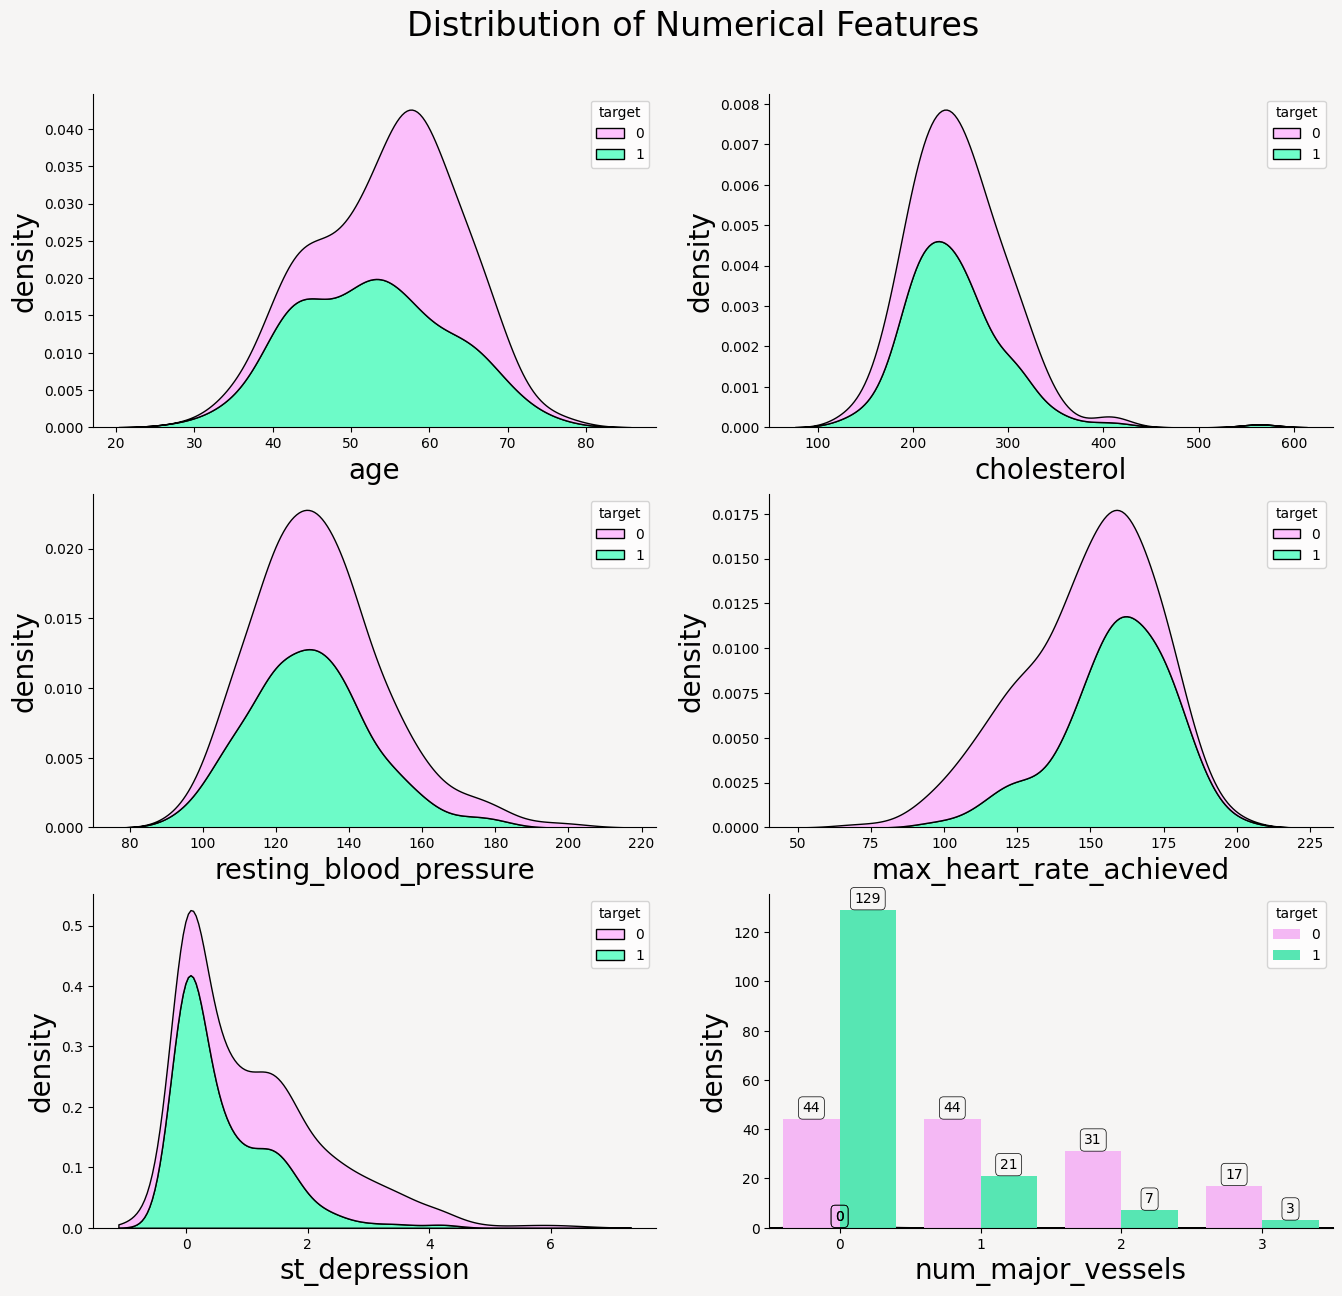

In [ ]:
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']
L = len(num_feats)
ncol= 2
nrow= int(np.ceil(L/ncol))
#remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol, figsize=(16, 14),facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')

    ax = sns.kdeplot(data=df, x=col, hue="target", multiple="stack", palette=mypal[1::4])
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("density", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)

    if col == 'num_major_vessels':
        sns.countplot(data=df, x=col, hue="target", palette=mypal[1::4])
        for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                      bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

    i = i + 1
plt.suptitle('Distribution of Numerical Features' ,fontsize = 24)

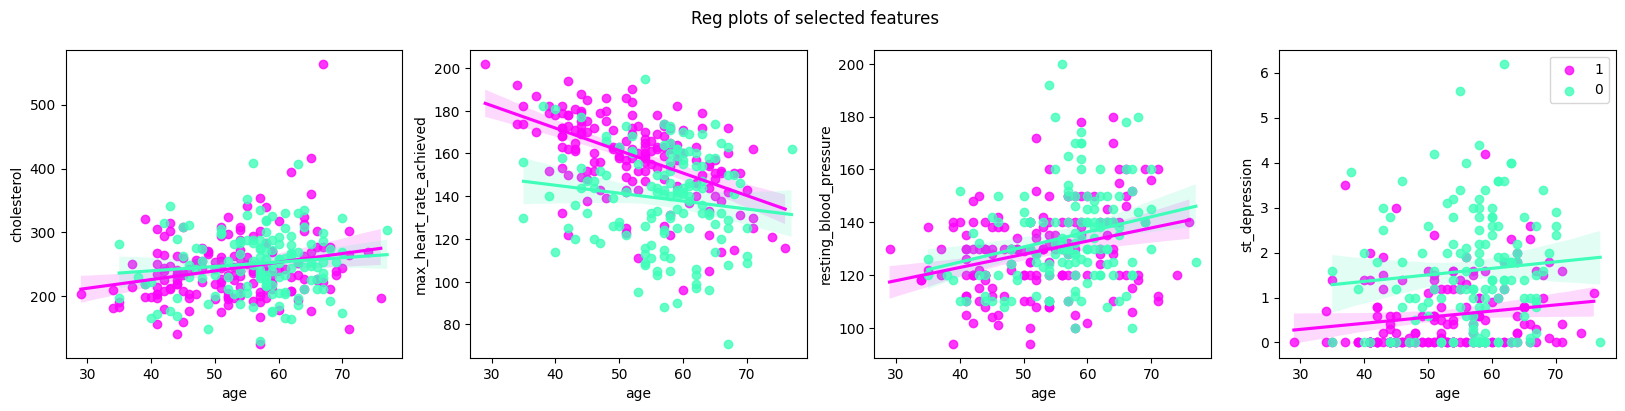

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(20, 4))
sns.regplot(data=df[df['target'] ==1], x='age', y='cholesterol', ax = ax[0], color=mypal[0], label='1')
sns.regplot(data=df[df['target'] ==0], x='age', y='cholesterol', ax = ax[0], color=mypal[5], label='0')
sns.regplot(data=df[df['target'] ==1], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[0], label='1')
sns.regplot(data=df[df['target'] ==0], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[5], label='0')
sns.regplot(data=df[df['target'] ==1], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[0], label='1')
sns.regplot(data=df[df['target'] ==0], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[5], label='0')
sns.regplot(data=df[df['target'] ==1], x='age', y='st_depression', ax = ax[3], color=mypal[0], label='1')
sns.regplot(data=df[df['target'] ==0], x='age', y='st_depression', ax = ax[3], color=mypal[5], label='0')
plt.suptitle('Reg plots of selected features')
plt.legend()

0

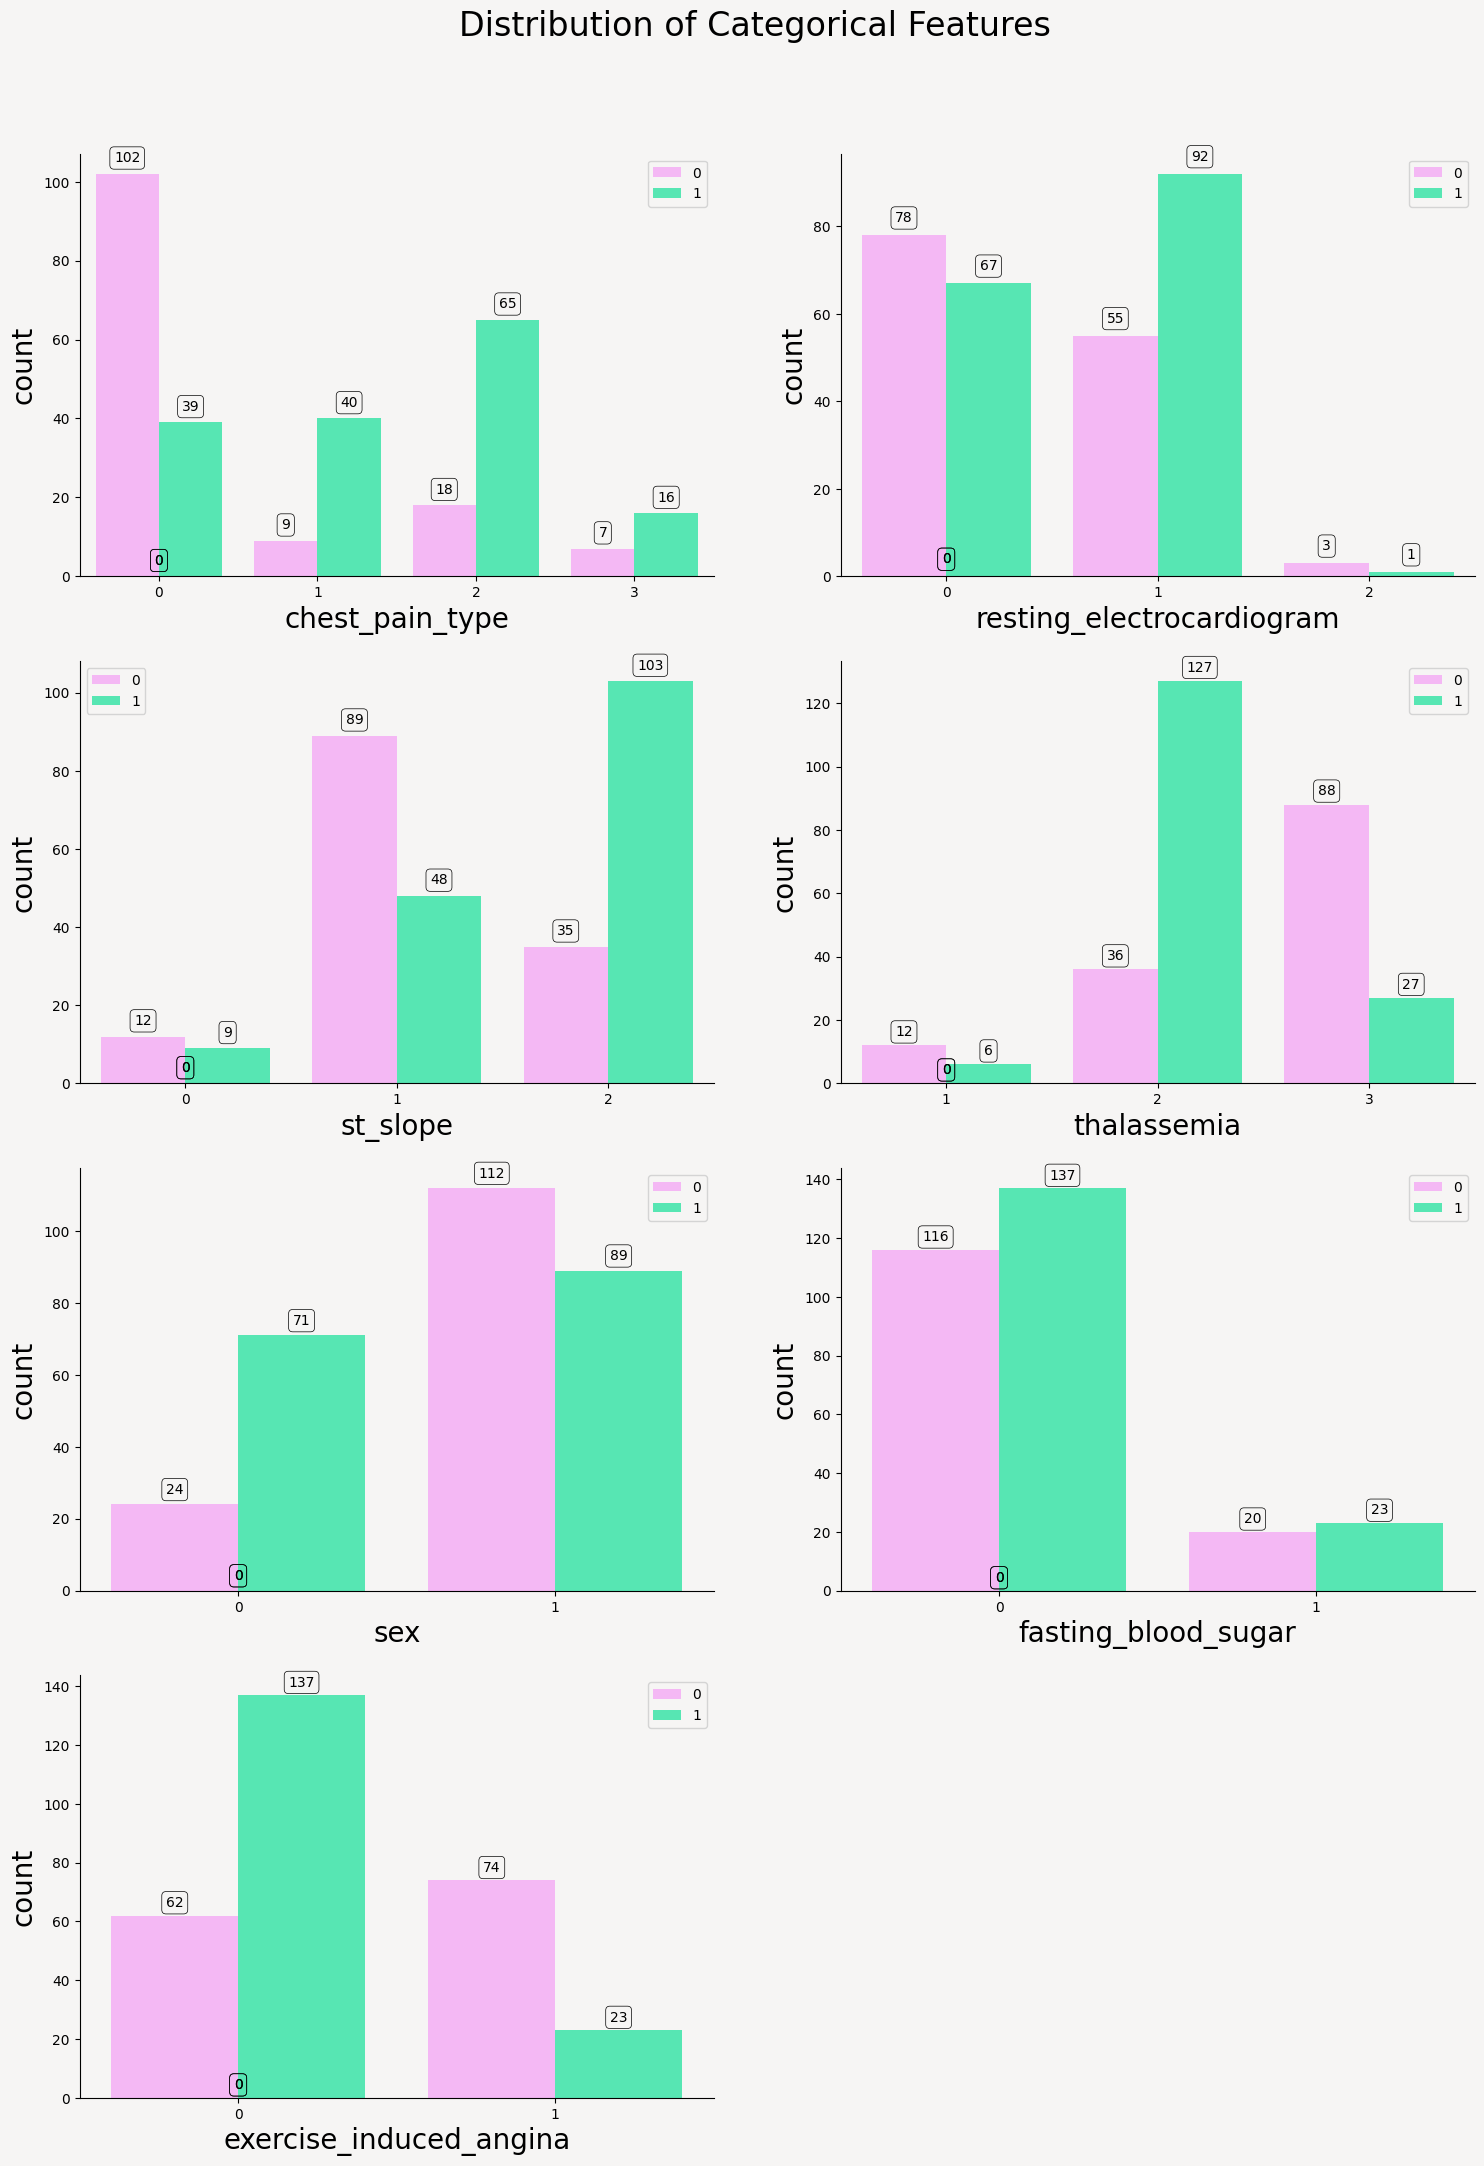

In [ ]:
def count_plot(data, cat_feats):
    L = len(cat_feats)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(18, 24), facecolor='#F6F5F4')
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in cat_feats:
        plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
        ax = sns.countplot(data=df, x=col, hue="target", palette=mypal[1::4])
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("count", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False)
        plt.legend(facecolor='#F6F5F4')

        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                  bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

        i = i +1

    plt.suptitle('Distribution of Categorical Features' ,fontsize = 24)
    return 0

count_plot(df, cat_feats[0:-1])

## ***Linear Regression - Choosing a numerical response***
We choose resting blood pressure as he dependent variable other variables as dependent varibles. We have three variable selection procedures namely, forward selection, backward  and step-wise selection.\
Here we happen to use step-wise regression procedure in order to choose our dependent variables for our independent varaible resting blood pressure.

About step wise regression:
It is a combination of both forward selection and backward elimination procedures.\
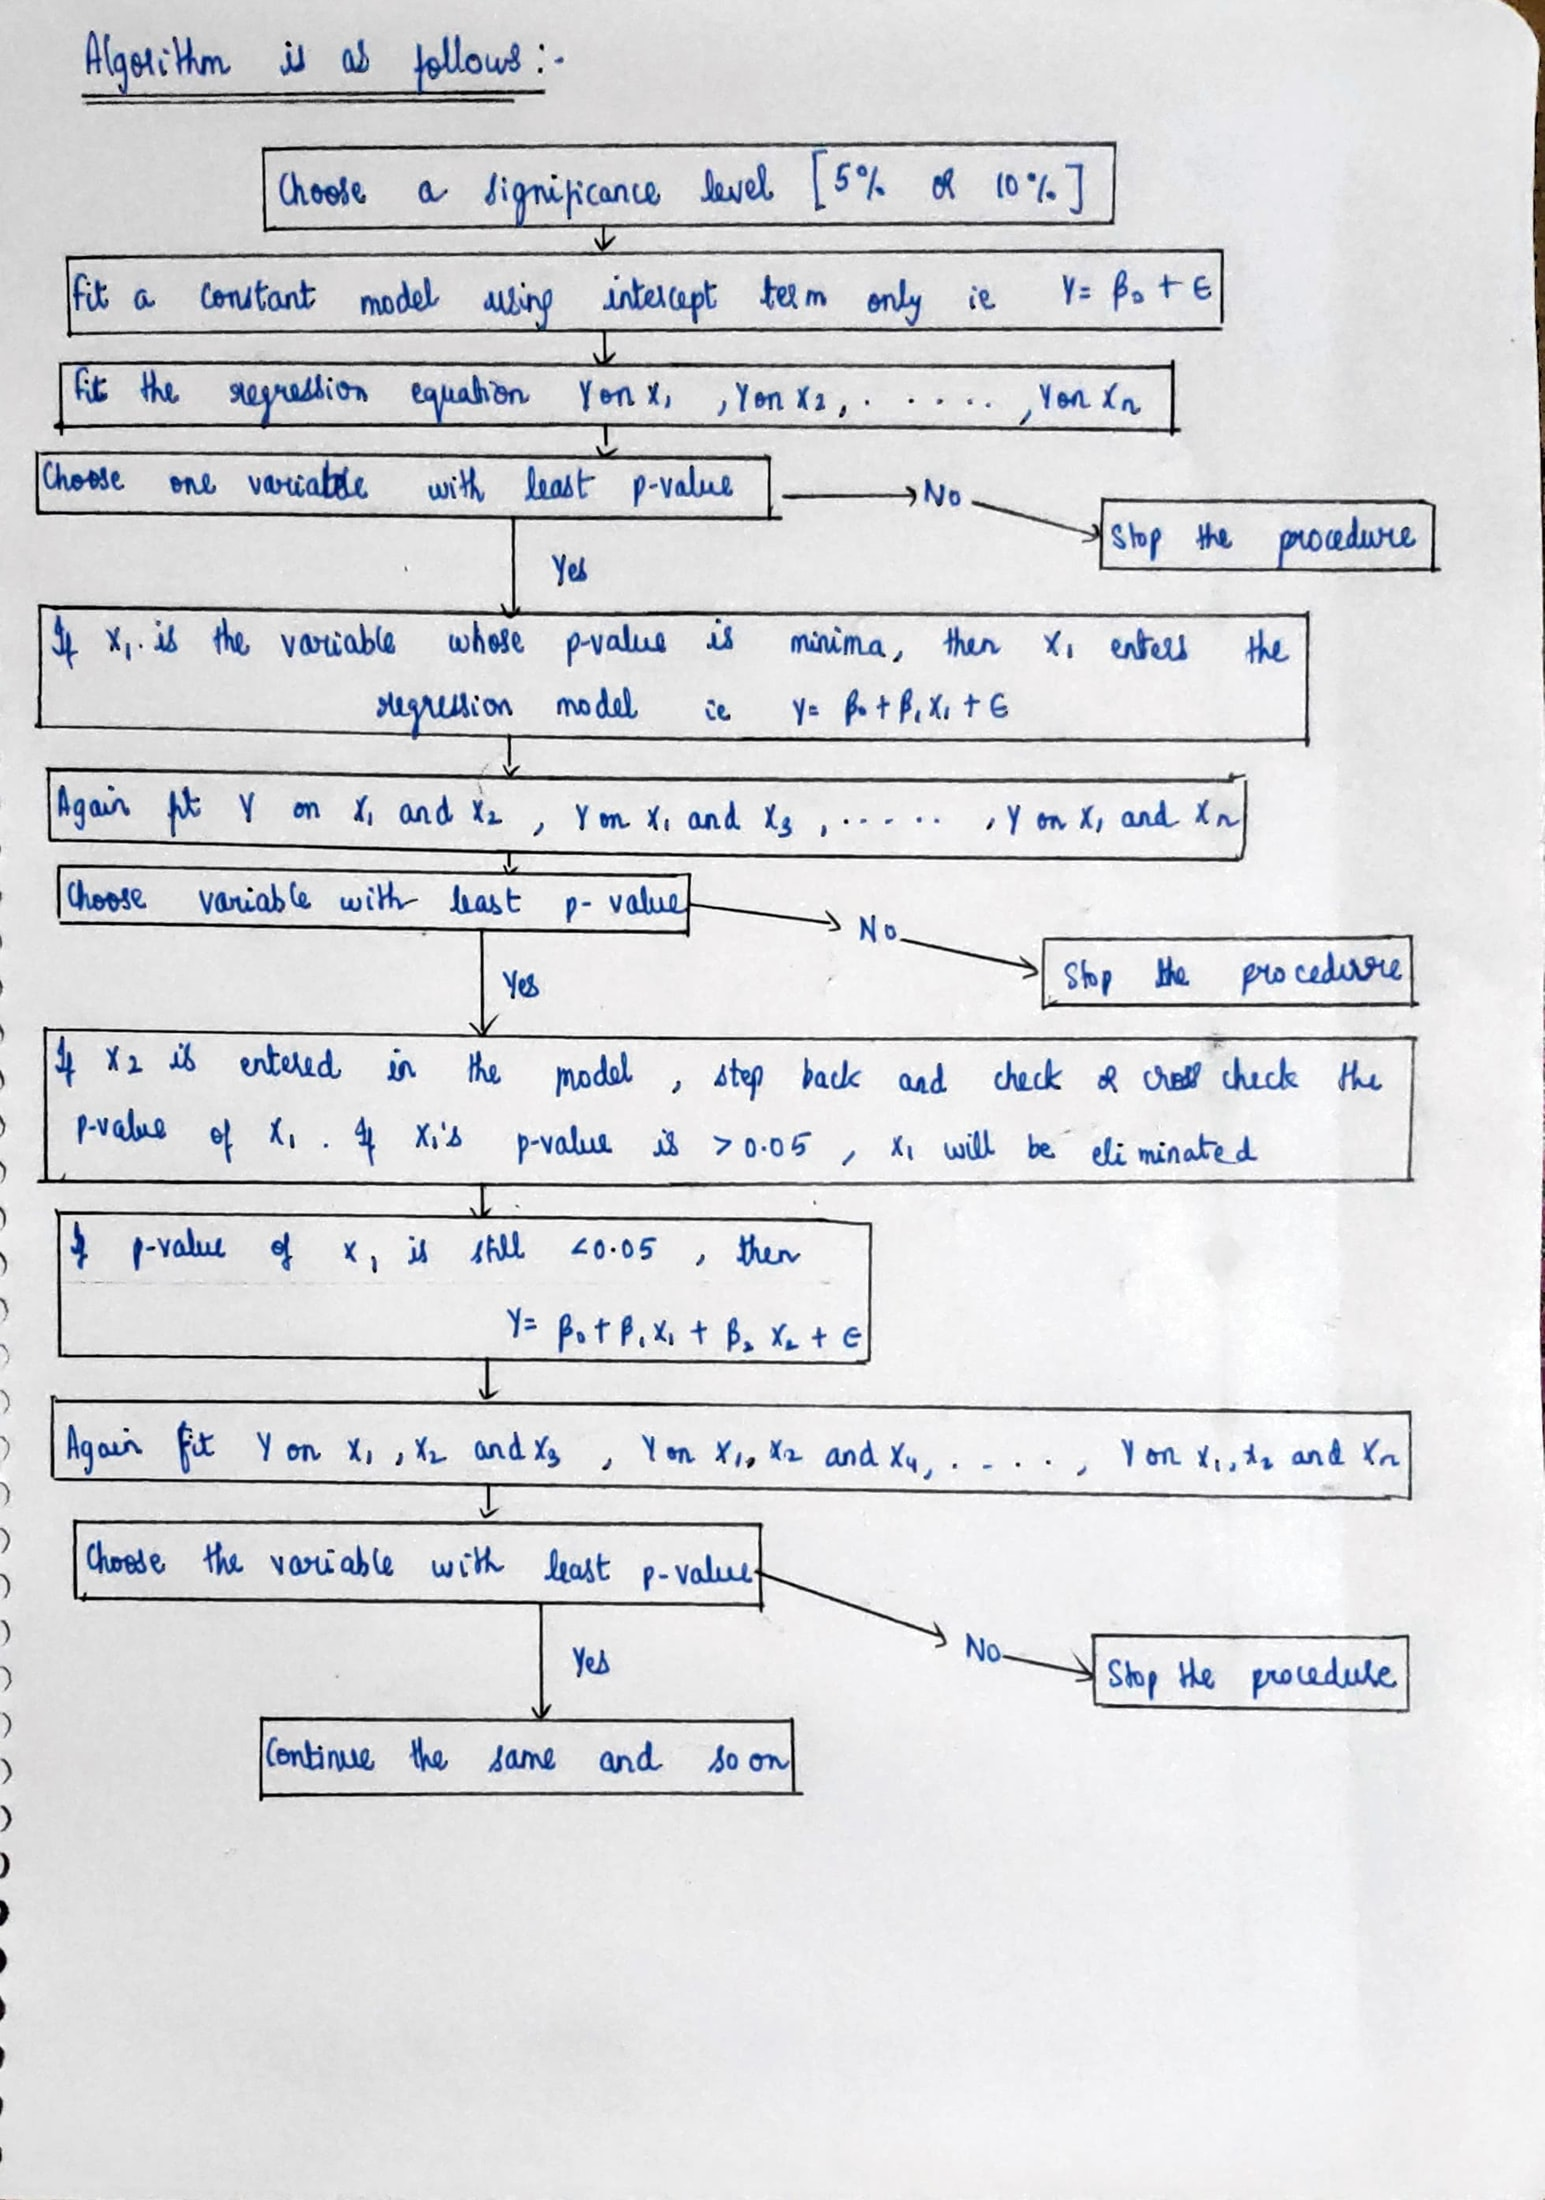

In [ ]:
# Separate the feature (X) and target variable (y)
X = df.drop('resting_blood_pressure', axis=1)  # Independent variable(regressors)
y = df['resting_blood_pressure'] # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Our interest here is to predict the resting blood pressure with all the remaining factors.

Thereafter, divide the data in 80-20 ratio where the analysis takes place on 80% of randomly selected data[training data] and prediction on the remaining 20%[testing data].

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 64 to 104
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        236 non-null    int64  
 1   sex                        236 non-null    int64  
 2   chest_pain_type            236 non-null    int64  
 3   cholesterol                236 non-null    int64  
 4   fasting_blood_sugar        236 non-null    int64  
 5   resting_electrocardiogram  236 non-null    int64  
 6   max_heart_rate_achieved    236 non-null    int64  
 7   exercise_induced_angina    236 non-null    int64  
 8   st_depression              236 non-null    float64
 9   st_slope                   236 non-null    int64  
 10  num_major_vessels          236 non-null    int64  
 11  thalassemia                236 non-null    int64  
 12  target                     236 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 25.8 KB


In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 236 entries, 64 to 104
Series name: resting_blood_pressure
Non-Null Count  Dtype
--------------  -----
236 non-null    int64
dtypes: int64(1)
memory usage: 3.7 KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 280 to 99
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        60 non-null     int64  
 1   sex                        60 non-null     int64  
 2   chest_pain_type            60 non-null     int64  
 3   cholesterol                60 non-null     int64  
 4   fasting_blood_sugar        60 non-null     int64  
 5   resting_electrocardiogram  60 non-null     int64  
 6   max_heart_rate_achieved    60 non-null     int64  
 7   exercise_induced_angina    60 non-null     int64  
 8   st_depression              60 non-null     float64
 9   st_slope                   60 non-null     int64  
 10  num_major_vessels          60 non-null     int64  
 11  thalassemia                60 non-null     int64  
 12  target                     60 non-null     int64  
dtypes: float64(1), int64(12)
memory usage: 6.6 KB


In [ ]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 60 entries, 280 to 99
Series name: resting_blood_pressure
Non-Null Count  Dtype
--------------  -----
60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


### ***Stepwise regression for linear regression analysis***

Considering blood pressure as dependent variable and remaining factors as independent, we will use the method step_wise selection to choose which of the remaining factors are suitable to act as a regressor.

In [ ]:
import statsmodels.api as sm
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out = 0.05,
                       verbose=True):
    # Start with an empty list or a user-defined list of initial features to include
    included = list(initial_list)
    while True: # Loop until no more changes are made to the list of included features
        changed=False # Flag to track whether any features were added or removed

# FORWARD STEP: Attempt to add a new feature
        excluded = list(set(X.columns)-set(included)) # List of features not currently included
        new_pval = pd.Series(index=excluded) # Series to hold p-values for each potential addition
        for new_column in excluded:
            # Fit model with current features plus one additional feature
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            # Store p-value of the added feature
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min() # Find the lowest p-value among the new features
        # If this p-value is below the threshold for inclusion, add the feature to the model
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose: # If verbose mode is on, print the feature added
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

# BACKWARD STEP: Attempt to remove an existing feature
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:] # Get p-values for all features except the intercept
        worst_pval = pvalues.max() # Find the highest p-value among the included features
        # If this p-value is above the threshold for exclusion, remove the feature from the model
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose: # If verbose mode is on, print the feature removed
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed: # If no features were added or removed, terminate the loop
            break
    return included

# Return the list of features that have been selected through stepwise regression
selected_features = stepwise_selection(X_train, y_train)

Add  age                            with p-value 1.48028e-05


Source: StackExchange
https://datascience.stackexchange.com/questions/24405/how-to-do-stepwise-regression-using-sklearn/24447#24447

This is the source referred for the above hard code on stepwise selection. There is no package or function available for it. The comments between the code snippets, describes how it works.

In [ ]:
X_train_selected = X_train[selected_features]

As, only age is being chosen as the regressor, all the other features are removed from the training dataset using step-wise regression.\
Few of the reasons for elimination of the factors might be due to higher p-value of the factors, there is even a change where the factor with lesser p-value will enter the model, but due to addition of the other factor with less p-value might increase the p-value of the previous factor.

Now, the estimation of the regression coefficients are done as follows:

In [ ]:
model0 = LinearRegression()
# Apply the model on the training set
model0.fit(X_train_selected, y_train)
print("Coefficient:", model0.coef_)
print("Intercept:", model0.intercept_)

Coefficient: [0.53756295]
Intercept: 101.53218179623397


We see that the model is:\
**Resting blood pressure = B0 + B1*Age + E[error]**\
The estimated model is:\
**Resting blood pressure = 101.5322 + 0.5376*Age**\
The inference from the model will be:\
When B1 = 0, then the average increase in resting blood pressure is 101.5322 mm Hg. When B0 = 0, a unit increase in age will increase blood pressure by 0.5376 mm Hg.

There are two ways to do linear regression- and it gives same results as seen from intercept and coefficients.

Below is the OLS regression method - Ordinary Least Square Regression method and its a better approach considering the clarity of output it provides.

## ***Model summary***

In [ ]:
X_train_selected = sm.add_constant(X_train[selected_features]) # Adding a constant to the model for the intercept
model = sm.OLS(y_train, X_train_selected).fit()
# Model summary
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     resting_blood_pressure   R-squared:                       0.077
Model:                                OLS   Adj. R-squared:                  0.073
Method:                     Least Squares   F-statistic:                     19.58
Date:                    Thu, 30 May 2024   Prob (F-statistic):           1.48e-05
Time:                            03:57:27   Log-Likelihood:                -999.76
No. Observations:                     236   AIC:                             2004.
Df Residuals:                         234   BIC:                             2010.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

We see that the p-values of both the regression coefficients are almost zero, which depicts that the factor is significant.\
The R-square obtained here is 7% here, where age is used to see the effect of resting blood pressure,using step wise regression procedure.\
We say that 7% of the data is explained by age for resting blood pressure.

In [ ]:
y_pred = model0.predict(X_test[selected_features])
results_df0 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results_df0.head(15))
print(results_df0.shape)

     Actual   Predicted
280     136  124.109825
157     122  120.346885
85      115  137.548899
83      152  129.485455
267     118  127.872766
9       150  132.173270
42      104  125.722514
284     140  134.323521
289     128  131.098144
94      112  125.722514
150     160  137.011336
216     130  134.861084
61      108  130.560581
223     200  131.635707
268     122  130.560581
(60, 2)


The above is the predicted values of the regressand. We use the testing dataset to obtain the above.

The data frame above is showing our actual vs predicted values. Due to very low R2 value, we can see for some values, the prediction is well matching, but in some cases, the difference is evitable.

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

318.1717898466928


Mean square error tells us about the average squared difference between the estimated values and the actual value.\
Here it is 318.1718

## ***Residual analysis***

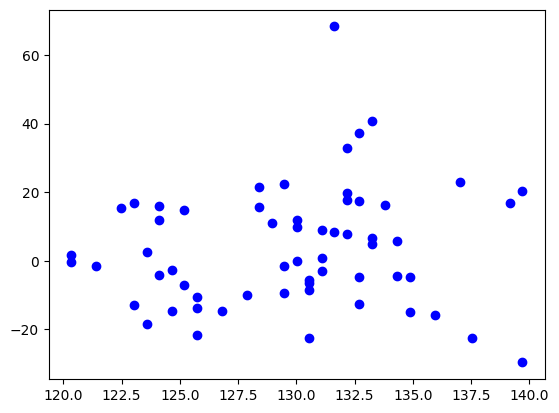

In [ ]:
resid= y_test - y_pred #residuals as the difference between the actual and predicted values.

plt.scatter(y_pred,resid,color="blue",linewidth=1)
plt.show()

There is a random pattern for the residuals. This says that there is no model defects.

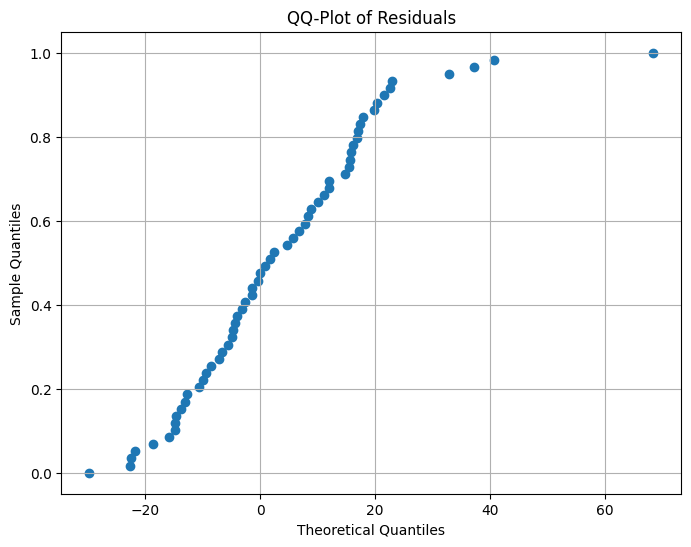

ShapiroResult(statistic=0.9543705582618713, pvalue=0.025116395205259323)

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(np.sort(resid), np.linspace(0, 1, len(resid)))
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("QQ-Plot of Residuals")
plt.grid(True)
plt.show()

from scipy.stats import shapiro
shapiro(resid)

The above is the qq-plot [quantile-quantile plot] which shows that not all observations lie on the line saying that the errors do not follow a normal distribution.\
From shapiro test, we see that the p-value is 0.0251, which is lesser than the significance level[5%]. This leads to the rejection of null hypothesis that errors follow a normal distribution.

### ***Breusch-Pagan test for constant variance of residuals***

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

bp_test= sms.het_breuschpagan(model.resid, model.model.exog) #using the residuals and model for bp test functioning
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
lzip(names, bp_test)

[('Lagrange multiplier statistic', 5.104820986995831),
 ('p-value', 0.02385944102719836),
 ('f-value', 5.173464929251504),
 ('f p-value', 0.023840452544283616)]

The first p-value returned by the test is based on the Lagrange multiplier (LM) statistic, which is used to test for heteroscedasticity. The LM test is a score test that assesses whether there is evidence against the null hypothesis of homoscedasticity (constant variance of residuals) in favor of the alternative hypothesis of heteroscedasticity (non-constant variance).

### ***Zero mean test***

In [ ]:
tstat, pval = stats.ttest_ind(resid, np.zeros_like(resid), alternative='two-sided')
print(pval)
# Check the p-value -  < 0.05 suggests non-zero mean and > 0.05 suggests zero mean, or the mean centered around zero, if not exact.

0.10008036818777342


The above is the non-zero mean.\
From the result obtained we conclude that, since the p-value is 0.1 this shows that there is zero mean or in other words the mean is centered around zero if not exact.

## ***Logistic Regression - Choosing a categorical response***

In logistic regression we use the logit function (log odds) to model the data. On transformation we can represent the probability (considered as the dependent variable) in terms of the independent variables from the data.

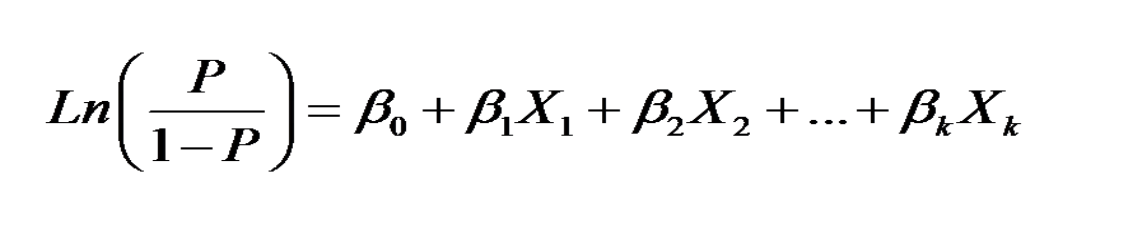

source : https://www.theanalysisfactor.com/what-is-logit-function/

To implement a logistic regression model, we need to consider a categorical variable as the dependent variable. In our case, we have the variable 'target' which specifies if a person has heart disease or not. <br><br>
So we will take 'target' as the dependent variable and proceed with the model. Similar to linear regression performed above, we need to select the variables to be used for building the logistic regression model. We can use the stepwise regression function we defined earlier to do the feature selection.


Even though the dependent variable is categorical the logistic regression model only accepts numerical responses. Under usual circumstances we create a dummy variable by recoding the categories as 0 and 1. Since it has already been converted, we will proceed with the model.
<br><br>
Note that (target=1) implies that the person has heart disease and (target=0) implies no heart disease.

In [ ]:
# Separate the feature (X) and target variable (y)
X1 = df.drop('target', axis=1)  # Independent variables
y1 = df['target']
# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

We have split the data into train and test data in 80:20 ratio which means that we will use 80% of the data to build the logistic regression model and 20% data to get predicted values and evaluate our model.

In [ ]:
selected_features1 = stepwise_selection(X1_train, y1_train)

Add  num_major_vessels              with p-value 3.55664e-15
Add  exercise_induced_angina        with p-value 9.48816e-08
Add  sex                            with p-value 5.03067e-06
Add  chest_pain_type                with p-value 2.43438e-05
Add  st_depression                  with p-value 2.26031e-05
Add  thalassemia                    with p-value 0.00211372


Using the step_wise selection method to select features for logistic model we can see that there are 6 final features selected for further analysis. The features are selected on the basis of least p-values of coefficients when building an OLS model.

## ***Model summary***

In [ ]:
# Fit model
X1_train_selected = sm.add_constant(X1_train[selected_features1])
model_cat = sm.Logit(y1_train,X1_train_selected )
result = model_cat.fit()
# Summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.371245
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  236
Model:                          Logit   Df Residuals:                      229
Method:                           MLE   Df Model:                            6
Date:                Thu, 30 May 2024   Pseudo R-squ.:                  0.4616
Time:                        03:58:00   Log-Likelihood:                -87.614
converged:                       True   LL-Null:                       -162.73
Covariance Type:            nonrobust   LLR p-value:                 6.881e-30
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       4.6577      0.912      5.105      0.000       2.869   

All the features included in the Logistic regression model have p-value less than 0.05 which means they significantly contribute in explaining the dependent variable 'target'.
<br><br>
We will get the predicted values of the target variable by using independent test data in the model built. The values obtained will be in the range of 0 to 1. Since the outcome is supposed to be categorical, we will consider a threshold of 0.5. Values above the threshold will be assigned to category '1' and below the threshold will be assigned '0'.
<br><br>
In general, the value 0.5 is used since it is the default threshold. It is important to note that the optimal threshold can be different.

In [ ]:
X1_test_selected = sm.add_constant(X1_test[selected_features1])
# Use the .predict() method on the fitted model
y1_pred_probabilities = result.predict(X1_test_selected)
threshold = 0.5
y1_pred_labels = (y1_pred_probabilities >= threshold).astype(int)

The values obtained from predict function have now be converted into categorical responses based on the threshold value 0.5.

In [ ]:
results_df = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred_labels})
print(results_df.head(15))
print(results_df.shape)

     Actual  Predicted
280       0          0
157       1          1
85        1          1
83        1          1
267       0          0
9         1          1
42        1          0
284       0          0
289       0          0
94        1          1
150       1          1
216       0          1
61        1          1
223       0          0
268       0          0
(60, 2)


The data frame above is showing our actual vs predicted values. Here 1 means the person has disease and 0 means its not. Due to a moderate R2 value, we can see for most values, the prediction is well matching, but in some cases, the difference is inevitable.

In [ ]:
mse1 = mean_squared_error(y1_test, y1_pred_probabilities)
print(mse1)

0.10413029196143286


## ***Confusion matrix***

Confusion Matrix:
 [[24  4]
 [ 4 28]]


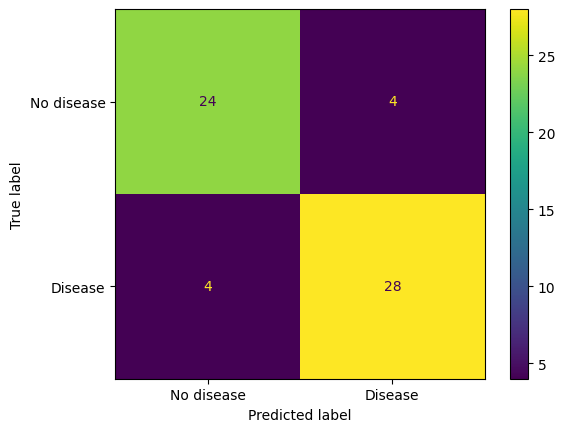

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y1_test, y1_pred_labels)
print("Confusion Matrix:\n", conf_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=['No disease','Disease'])
cm_display.plot()

In [ ]:
#Metrics
TP = 28
TN = 24
FP = 4
FN = 4
accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = precision*recall/(precision+recall)

print("Accuracy of the model : ",accuracy)
print("Precision of the model : ",precision)
print("Recall of thr model : ",recall)
print("f1_score : ",f1_score)

Accuracy of the model :  0.8666666666666667
Precision of the model :  0.875
Recall of thr model :  0.875
f1_score :  0.4375


## ***Conclusion***

As we have used 60 observations for testing the model, the total frequency count in the confusion matrix sums to 60.

Out of these 60, we have 4 false positive and 4 false negative cases, which is less compared to the rest 52 results that were correctly obtained. Hence the accuracy is 86.7%

The precision value of 0.875 implies that 87.5% of the predicted positive cases are actually positive.
<br>
The recall value of 0.875 implies that 87.5% of the actual positive cases are correctly predicted as positive.

f1_score being the harmonic mean of precision and recall is a measure that balances the weights of precision and recall incase they are very different.
<br>

In our case, the model has an f1_score of 0.875 which implies that the our model is a good one since a f1_score of 0.7 or higher is considered good for a classification model.
<br>

ref : https://serokell.io/blog/a-guide-to-f1-score

## ***Impact of skewed data on regression coefficient***

#### ***Introduction:***

Here, we aim to investigate the impact of replacing the regressor observations with random numbers generated from a skewed distribution on a previously fitted simple linear regression model. Initially, we simulate two sets of random numbers from a normal population with different parameters and fit a simple linear regression model using these data. Subsequently, we replace the regressor observations with a set of random numbers generated from a skewed distribution. The main objective is to observe any changes in the coefficients of the earlier-fitted model, which was based on normality assumptions. Additionally, we seek to quantify the rate of change in the coefficients for the change in skewness of the regressor variable. This analysis helps in understanding how deviations from normality affect the stability and reliability of regression models.


### ***Constructing two data sets of random numbers from a **normal population** with different parameters***


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.stats import skewnorm, shapiro, ttest_1samp
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Generate random numbers from normal distributions
mean1, std1 = 4, 2
mean2, std2 = 8, 3
sample_size = 500

Creating a dataframe for the regressor and response variable as D_X and D_Y

In [ ]:
D_X = pd.DataFrame({'X': np.random.normal(mean1, std1, sample_size)})
D_X

,X
0,2.386434
1,6.058924
2,5.015649
3,2.614870
4,2.092785
...,...
495,3.407147
496,5.019061
497,2.912793
498,7.624280


In [ ]:
D_Y = pd.DataFrame({'Y': np.random.normal(mean2, std2, sample_size)})
D_Y

,Y
0,2.925682
1,8.101917
2,5.295166
3,3.483802
4,2.264343
...,...
495,3.030670
496,17.263836
497,2.696128
498,13.884436


#### Fitting linear regression model

In [ ]:
# Linear regression model for data1
model = LinearRegression().fit(D_X, D_Y)
model

LinearRegression()

predicting response variable(D_Y) using regressor D_X

In [ ]:
Y_pred=model.predict(D_X)
Y_pred

array([[8.24785199],
       [7.85324421],
       [7.96534369],
       [8.22330668],
       [8.2794045 ],
       [8.16686006],
       [7.93777362],
       [8.013072  ],
       [8.16642045],
       [8.11511466],
       [8.30418737],
       [8.05618408],
       [8.21975521],
       [7.93825949],
       [7.76001569],
       [7.96063445],
       [7.94605193],
       [7.96503053],
       [8.12381904],
       [7.8778603 ],
       [8.02240015],
       [8.0894869 ],
       [7.99719791],
       [8.26221019],
       [7.82299363],
       [7.90762237],
       [8.21054791],
       [8.24214453],
       [8.24072996],
       [7.74787038],
       [7.77219712],
       [8.13109207],
       [8.01973934],
       [8.28651999],
       [8.21488923],
       [7.99043847],
       [7.87123566],
       [7.57006843],
       [8.24117054],
       [7.6049869 ],
       [7.95476394],
       [7.86696248],
       [7.84526653],
       [8.14787116],
       [8.06773728],
       [8.03056396],
       [8.31588963],
       [8.278

#### ***Model summary***

In [ ]:
# Summary of data1
X_with_const = sm.add_constant(D_X)
model1 = sm.OLS(D_Y, X_with_const).fit()
print("Summary for regression model:")
print(model1.summary())

Summary for regression model:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.098
Date:                Thu, 30 May 2024   Prob (F-statistic):              0.148
Time:                        03:58:59   Log-Likelihood:                -1283.2
No. Observations:                 500   AIC:                             2570.
Df Residuals:                     498   BIC:                             2579.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5043 

In [ ]:
print("The intercept is :")
print(model1.params[0])
print("The slope is :")
print(model1.params[1])

The intercept is :
8.504273571511654
The slope is :
-0.107449670261867


### ***Residual analysis for the linear model***

A positive residual means the observed value is higher than the predicted value, while a negative residual indicates the observed value is lower than the prediction.

In [ ]:
t_test, p_val = ttest_1samp(resid, 0)
t_test, p_val

(1.657472408841864, 0.1027325580694159)

Here we assume that the population mean is 0 , t-statistic(t_test) measures how far the sample mean deviates from the assumed population mean.

if p_value is >=0.05, we fail to reject the null hypothesis, implying that there is no significant difference between the sample mean and population mean(H0 = 0). If p_value is < 0.05, we reject the null hypothesis, implying that there is significant difference between the sample mean and population mean.

*  If the p-value of breuschpagan test is >= 0.05 then we fail to reject the null hypothesis, implies residuals have constant variance that is homoscedasticity exists.
*  If the p-value of breuschpagan test is < 0.05 then we reject null hypothesis, implies residuals do not have constant variance that is heteroscedasticity exists in the data.

#### ***Normality assumptions***

In [ ]:
# Residuals analysis for data1
stat1, p_value1 = shapiro(resid)
print("Shapiro-Wilk test for the model:")
print("Test Statistic:", stat1)
print("P-value:", p_value1)
if p_value1 > 0.05:
    print("Residuals are normally distributed")
else:
    print("Residuals are not normally distributed")

Shapiro-Wilk test for the model:
Test Statistic: 0.9543705582618713
P-value: 0.025116395205259323
Residuals are not normally distributed


The Shapiro–Wilk test is a hypothesis test to decide whether or not sample data were likely to have come from a normal distribution.
For this test, the hypothesis is framed as follows:

*   Null hypothesis: The sample comes from a normal distribution
*   Alternative hypothesis: The sample doesn't come from a normal distribution

The test rejects the hypothesis of normality when the p-value is less than or equal to 0.05, from the Shapiro-Wilk test we conclude that residuals are normally distributed.

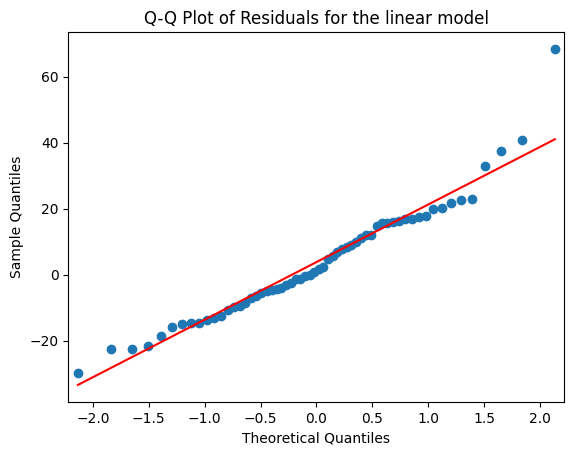

In [ ]:
# Q-Q plot for residuals of data1
sm.qqplot(resid, line='s')
plt.title("Q-Q Plot of Residuals for the linear model")
plt.show()

#### ***Performing Durbin-Watson test for finding autocorrelation***

In [ ]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(resid)

2.37269778026518

Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals. Autocorrelation measures the relationship between a variable’s current value and its past values.

1.   Null Hypothesis: First order autocorrelation does not exist.
2.   Alternate Hypothesis: First order autocorrelation exists.



Testing for positive autocorrelation:
*   d < dL = positive autocorrelation is present
*   d > dU = No positive autocorrelation
*   dL < d < dU = Test is inconclusive

The value of d always lies between 0 and 4. If d is close to 2 it means there is no autocorrelation, and we accept the null hypothesis. We find out the critical values dL and dU for the data using Durbin-Watson table. dL is the Lower critical value and dU is the Upper critical value.

### ***Replacing the regressor variable with a set of random numbers generated from a skewed distribution.***

In [ ]:
# generating set of random numbers from skewed distribution
skewness= -25
SKWDX = pd.DataFrame({'XSKWD': skewnorm.rvs(a=skewness, loc=mean1, scale=std1, size=sample_size)})
print(SKWDX)

        XSKWD
0    1.591519
1    0.062249
2    2.678517
3    2.580584
4    2.021510
..        ...
495  3.475002
496  1.077591
497  1.672525
498  3.560546
499 -2.050851

[500 rows x 1 columns]


For each value of x,it generates a sample of random variates from a skewed distribution

### ***Linear model for skewed data***

In [ ]:
model_SKWD = LinearRegression().fit(SKWDX, D_Y)
print(model_SKWD)

LinearRegression()


#### ***Summary of the model***

In [ ]:
X_with_const = sm.add_constant(SKWDX)
SKWDX1 = sm.OLS(D_Y, X_with_const).fit()
print("Model Summary for Skewed Data:")
print(SKWDX1.summary())


Model Summary for Skewed Data:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.168
Date:                Thu, 30 May 2024   Prob (F-statistic):             0.0757
Time:                        04:01:05   Log-Likelihood:                -1282.7
No. Observations:                 500   AIC:                             2569.
Df Residuals:                     498   BIC:                             2578.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5661

In [ ]:
print("The intercept is :")
print(SKWDX1.params[0])
print("The slope is :")
print(SKWDX1.params[1])

The intercept is :
8.56612901568835
The slope is :
-0.2088512233018811


### ***Residual analysis***

In [ ]:
residl = SKWDX1.resid
residl

0     -5.308056
1     -0.451211
2     -2.711551
3     -4.543369
4     -5.879592
         ...   
495   -4.809701
496    8.922763
497   -5.520692
498    6.061931
499   -2.475124
Length: 500, dtype: float64

In [ ]:
t_test, p_val = ttest_1samp(residl, 0)
t_test, p_val

(-1.0314185825214735e-14, 0.9999999999999918)

Here we assume that the population mean is 0 , t-statistic(t_test) measures how far the sample mean deviates from the assumed population mean.

if p_value is >=0.05, we fail to reject the null hypothesis, implying that there is no significant difference between the sample mean and population mean(H0 = 0). If p_value is < 0.05, we reject the null hypothesis, implying that there is significant difference between the sample mean and population mean.

#### ***Breuschpagan test for finding the homoscedasticity***

In [ ]:
_,p_value,_,_ = het_breuschpagan(residl, SKWDX1.model.exog)
print("The p-value is:")
print( p_value)

The p-value is:
0.04847184849898075


*  If the p-value of breuschpagan test is >= 0.05 then we fail to reject the null hypothesis, implies residuals have constant variance that is homoscedasticity exists.
*  If the p-value of breuschpagan test is < 0.05 then we reject null hypothesis, implies residuals do not have constant variance that is heteroscedasticity exists in the data.

#### ***Normality assumptions***

In [ ]:
stat_skewed, p_value_skewed = shapiro(residl)
print("Shapiro-Wilk test for SKWDX:")
print("Test Statistic:", stat_skewed)
print("P-value:", p_value_skewed)
if p_value_skewed > 0.05:
    print("Residuals are normally distributed")
else:
    print("Residuals are not normally distributed")

Shapiro-Wilk test for SKWDX:
Test Statistic: 0.9971555471420288
P-value: 0.5422192215919495
Residuals are normally distributed


The Shapiro–Wilk test is a hypothesis test to decide whether or not sample data were likely to have come from a normal distribution.
For this test, the hypothesis is framed as follows:

*   Null hypothesis: The sample comes from a normal distribution
*   Alternative hypothesis: The sample doesn't come from a normal distribution

The test rejects the hypothesis of normality when the p-value is less than or equal to 0.05, from the Shapiro-Wilk test we conclude that residuals are normally distributed.

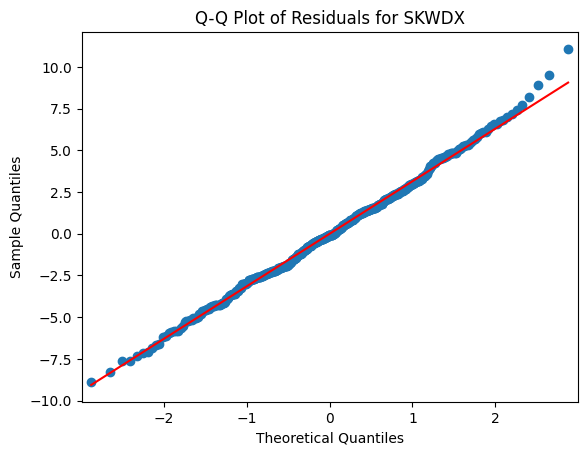

In [ ]:
sm.qqplot(residl, line='s')
plt.title("Q-Q Plot of Residuals for SKWDX")
plt.show()

#### ***Performing Durbin-Watson test for finding autocorrelation***

In [ ]:
durbin_watson(residl)

1.9989264441511

Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals. Autocorrelation measures the relationship between a variable’s current value and its past values.

1.   Null Hypothesis: First order autocorrelation does not exist.
2.   Alternate Hypothesis: First order autocorrelation exists.



Testing for positive autocorrelation:
*   d < dL = positive autocorrelation is present
*   d > dU = No positive autocorrelation
*   dL < d < dU = Test is inconclusive

The value of d always lies between 0 and 4. If d is close to 2 it means there is no autocorrelation, and we accept the null hypothesis. We find out the critical values dL and dU for the data using Durbin-Watson table. dL is the Lower critical value and dU is the Upper critical value.

## ***Performing the above operation with different types of skewness and analysing the rate of change in the coefficients that is B0(intercept) and the B1(slope).***

In [ ]:
skwd_list = [x for x in range(-30,31,2)]
B0_list = []
B1_list = []
for x in skwd_list:
  np.random.seed()
  skwdx = pd.DataFrame({'xskwd': skewnorm.rvs(a=skewness, loc=mean1, scale=std1, size=sample_size)})
  skwdx_with_constant = sm.add_constant(skwdx)
  skwdx1 = sm.OLS(D_Y, skwdx_with_constant).fit()
  B0_list.append(float(skwdx1.params[0]))
  B1_list.append(float(skwdx1.params[1]))


In [ ]:
change_rate = pd.DataFrame({"skewness": skwd_list, "Intercept": B0_list, "Slope": B1_list})
print(change_rate)

    skewness  Intercept     Slope
0        -30   8.016184  0.019200
1        -28   8.005465  0.024377
2        -26   8.116887 -0.021909
3        -24   8.002469  0.025106
4        -22   8.084021 -0.008403
5        -20   8.437448 -0.153112
6        -18   7.721950  0.137063
7        -16   8.068274 -0.001849
8        -14   7.810445  0.103719
9        -12   8.202286 -0.057384
10       -10   8.694254 -0.256708
11        -8   8.200154 -0.058904
12        -6   7.681075  0.153924
13        -4   8.345964 -0.120827
14        -2   8.044090  0.008179
15         0   8.037637  0.011131
16         2   7.937722  0.054669
17         4   8.540762 -0.200001
18         6   8.120569 -0.023814
19         8   7.887664  0.073753
20        10   8.169868 -0.044889
21        12   8.254331 -0.078168
22        14   7.858208  0.085963
23        16   7.984641  0.032907
24        18   8.214921 -0.060425
25        20   7.588484  0.195333
26        22   7.724037  0.139692
27        24   7.686236  0.160864
28        26  

the above output shows the rate of change of intercept and slope for the different skewness.

## ***Conclusion:***
we simulate the two set of random numbers from the normal distribution with different parameters and fitted a linear regression model to it. where the model follows all the assumptions.

after that we replace the regressor by the set of random variables generated from skewed distribution to check the rate of change in coefficient for the change in skewness of the regressor variable.this model also follows all the assumptions.



and also we analysis the rate of change in coefficient for different skewness.

for change in skewness, the coefficient changes is small. from this we conclude that the impact of skewness is minor on this model.


## ***Address the above with objectives concerning the change in the regressor's mean, variance and standard deviation.***

To address this question, we will need to analyse how the introduction of skewness to the regressor variable affects its statistical properties.\
Specifically, we will examine how the mean, variance, and standard deviation of the regressor change as the skewness of its distribution changes.
Here is how we can approach this:\
We have generated normal data by simulating two sets of random numbers from normal populations with different parameters, representing the regressor and the dependent variable.\
We then fit a simple linear regression model using the normal data as regressors.\
Then, we introduced negative skewness by replacing the regressor observations with a set of random numbers generated from a negatively skewed distribution, varying the skewness parameter.\
The changes in the mean, standard deviation and variance will be as follows,
1.	Mean: The mean (or average) of the regressor will change to the mean of the skewed distribution. If the skewed distribution is positively skewed (right-skewed), the mean will be greater than the median. If it is negatively skewed (left-skewed), the mean will be less than the median.
2.	Variance: The variance, which measures the dispersion of the data points from the mean, will also change. If the skewed distribution has a larger spread than the original data, the variance will increase. If the spread is smaller, the variance will decrease.
3.	Standard Deviation: The standard deviation, which is the square root of the variance, will change in the same direction as the variance. If the variance increases, the standard deviation will also increase, and vice versa.
In this particular case, we observe that the mean of the first model is 3.920505. The mean of the skewed model is 2.378053. The skewed model exhibits a lower mean, indicating a shift in the data distribution towards lower values.
We observe that the standard deviation of the first model is 1.957416. The standard deviation of the skewed model is 1.212693. We observe that the variance of the first model is 3.831477. The variance of the skewed model is 1.470623. Additionally, the standard deviation and variance are lower in the skewed model, suggesting reduced variability around the mean compared to the normal distribution.\
Since we have a negatively skewed distribution, the statistics indicate that the data is shifted towards the lower end of the scale, with moderate variability around the mean. The observed skewness likely impacts the distribution's shape, potentially influencing regression model performance and interpretation. Adjustments may be necessary to account for the skewed nature of the data in analysis and modelling processes. In conclusion, when comparing the regressor's statistics between the normal and skewed models, noticeable differences emerge. These findings underscore the importance of considering the distributional characteristics of data, as skewed distributions may require tailored analytical approaches to accurately interpret and model the data.
